# K-Means Clustering Projekt - Lösungen


Es ist meistens recht schwierig nachzuvollziehen wie gut ein Modell gelaufen ist, wenn man ein Unsupervised Learning Problem hat.

Für dieses Projekt werden wir einen Datensatz aus dem UCI Archiv verwenden, der Rot- und Weißweine beinhaltet (dies ist ein weit verbreiteter Datensatz in Maschine Learning). 

Wir werden ein Label für den zusammengesetzten Datensatz hinzufügen. Später werden wir auf dieses Label zurückgreifen, um zu überprüfen wie gut wir die Weine gruppieren können.


## Download der Daten

**[Downloade hier die zwei csv Datein von der UCI Bibliothek](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)**

** Verwende `read.csv` um beide Datensätze einzulesen und setze sie auf  df1 und df2. Achte darauf was das Trennzeichen `(sep)` ist.**

In [1]:
df1 <- read.csv('winequality-red.csv',sep=';')
df2 <- read.csv('winequality-white.csv',sep=';')

** Füge nun eine Spalte für df1 und df2 hinzu. Sie dient zur Benennung der Weine (`red` or `white`)**


In [2]:
# Hier gibt es mehrere Möglichkeiten dies zu lösen

# sapply mit der anon Funktion
df1$label <- sapply(df1$pH,function(x){'red'})
df2$label <- sapply(df2$pH,function(x){'white'})

**Überprüfe den head von df1 und df2.**

In [3]:
head(df1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [4]:
head(df2)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white


**Kombiniere df1 und df2 zu einem einzigen Dataframe der `wine` heißt** 


In [5]:
wine <- rbind(df1,df2)

In [6]:
str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ label               : chr  "red" "red" "red" "red" ...


## EDA

Jetzt werden wir die Daten ein bisschen genauer erkunden und üben nochmal unsere `ggplot2` Fähigkeiten:

**Erstelle ein Histogramm des restlichen Zuckers (=`residual.sugar`) von dem Weindatensatz. Verwende Rotwein und Weißwein als Farbskala.**

In [7]:
library(ggplot2)

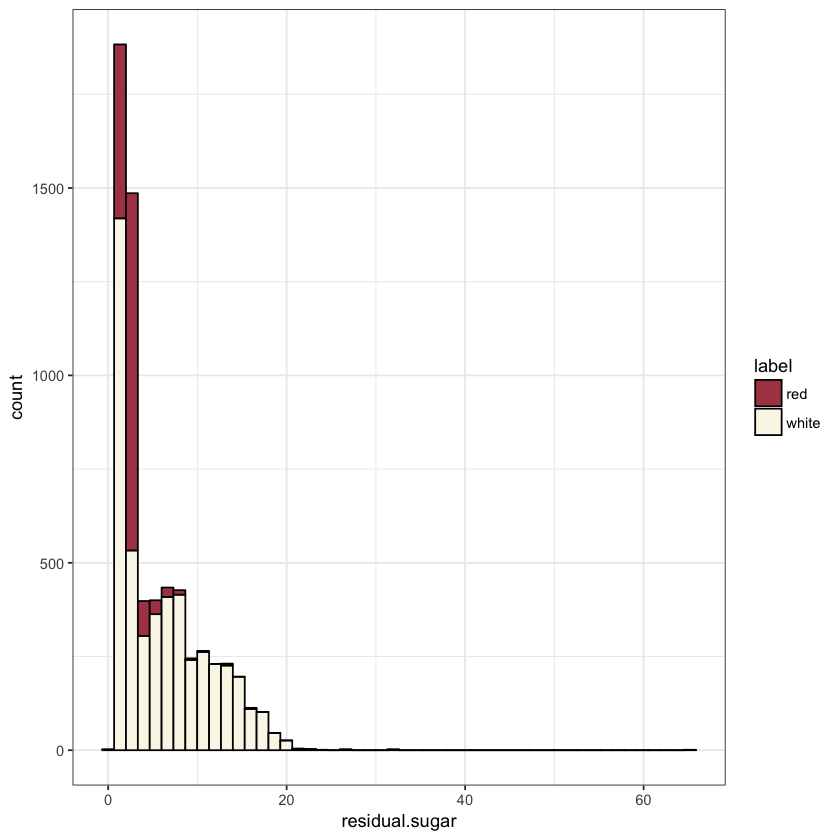

In [8]:
pl <- ggplot(wine,aes(x=residual.sugar)) + geom_histogram(aes(fill=label),color='black',bins=50)
# Optional die Füllbarben hinzufügen
pl + scale_fill_manual(values = c('#ae4554','#faf7ea')) + theme_bw()

**Erstelle ein Histogramm der Zitronensäure (=`citric.acid`) aus dem Weindatensatz. Verwende Rotwein und Weißwein als Farbskala.**

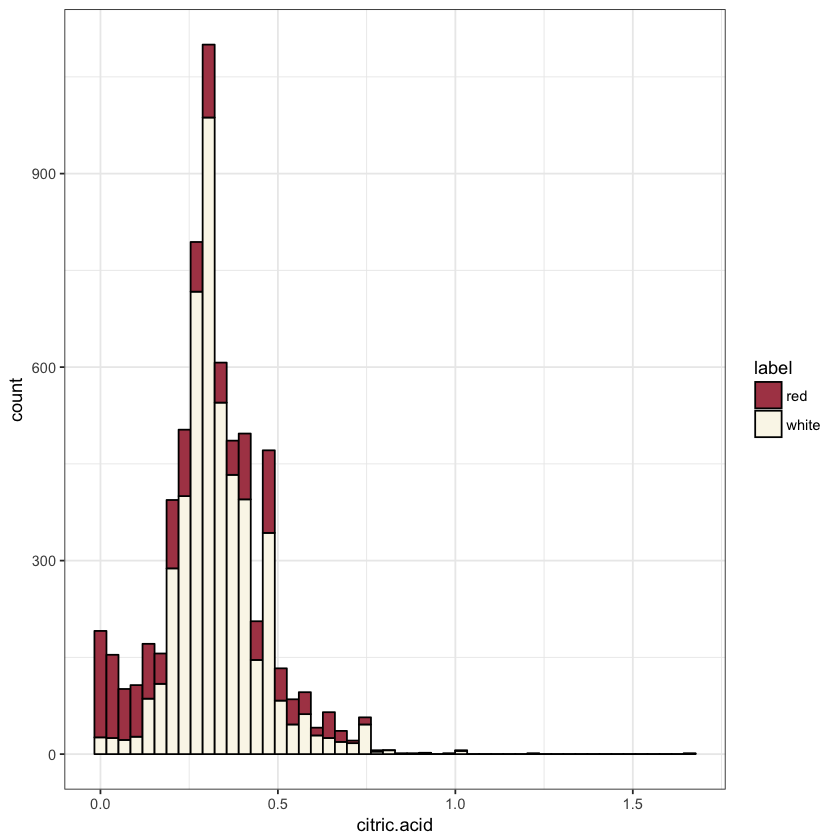

In [9]:
pl <- ggplot(wine,aes(x=citric.acid)) + geom_histogram(aes(fill=label),color='black',bins=50)
# Optional die Füllbarben hinzufügen
pl + scale_fill_manual(values = c('#ae4554','#faf7ea')) + theme_bw()

**Erstelle ein Histogramm des Alkohols (=`alcohol`) aus dem Weindatensatz. Verwende Rotwein und Weißwein als Farbskala.**

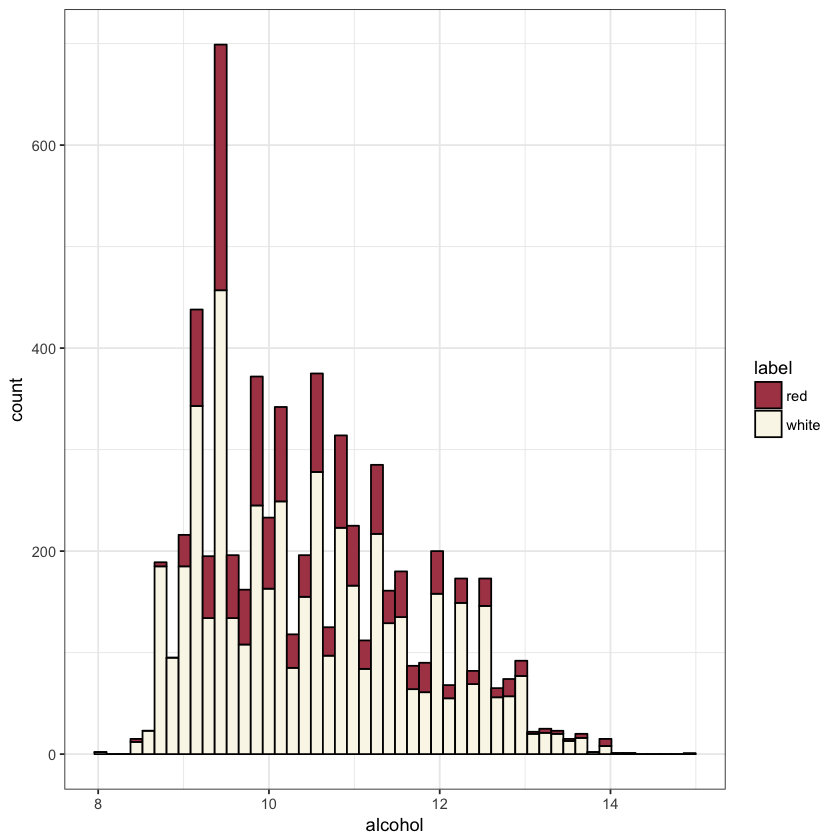

In [10]:
pl <- ggplot(wine,aes(x=alcohol)) + geom_histogram(aes(fill=label),color='black',bins=50)
# Optional die Füllbarben hinzufügen
pl + scale_fill_manual(values = c('#ae4554','#faf7ea')) + theme_bw()

**Erstelle ein Streudiagramm das `residual.sugar` und `citric.acid` gegenüberstellt. Verwende Rotwein und Weißwein als Farbskala.**

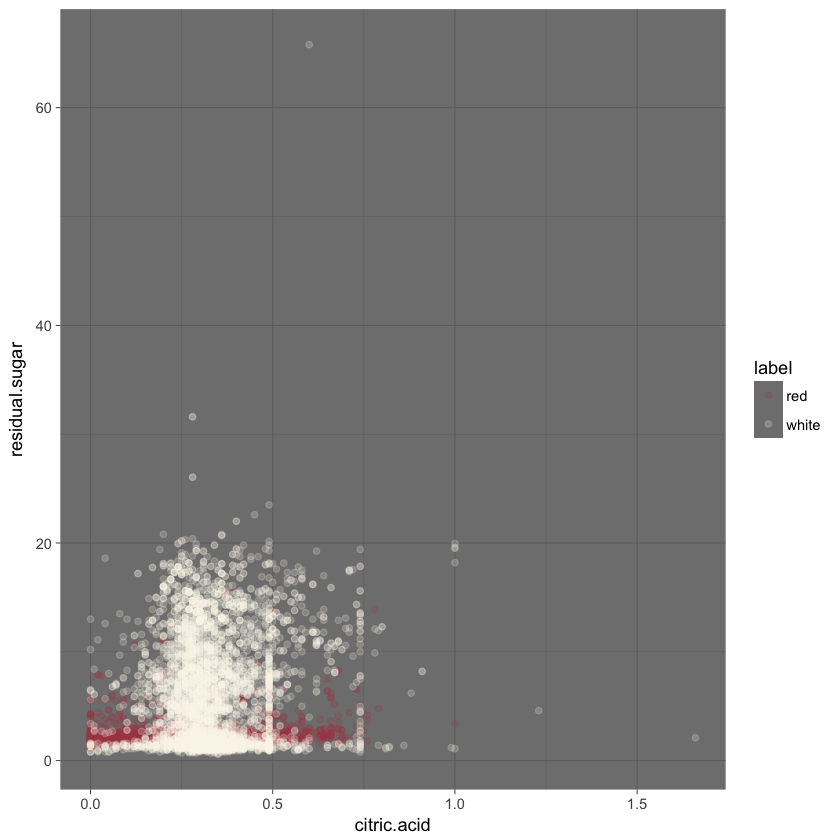

In [11]:
pl <- ggplot(wine,aes(x=citric.acid,y=residual.sugar)) + geom_point(aes(color=label),alpha=0.2)
# Optional die Füllbarben hinzufügen
pl + scale_color_manual(values = c('#ae4554','#faf7ea')) +theme_dark()

**Erstelle ein Streudiagramm das `volatile.acidity` und `residual.sugar` gegenüberstellt. Verwende Rotwein und Weißwein als Farbskala.**

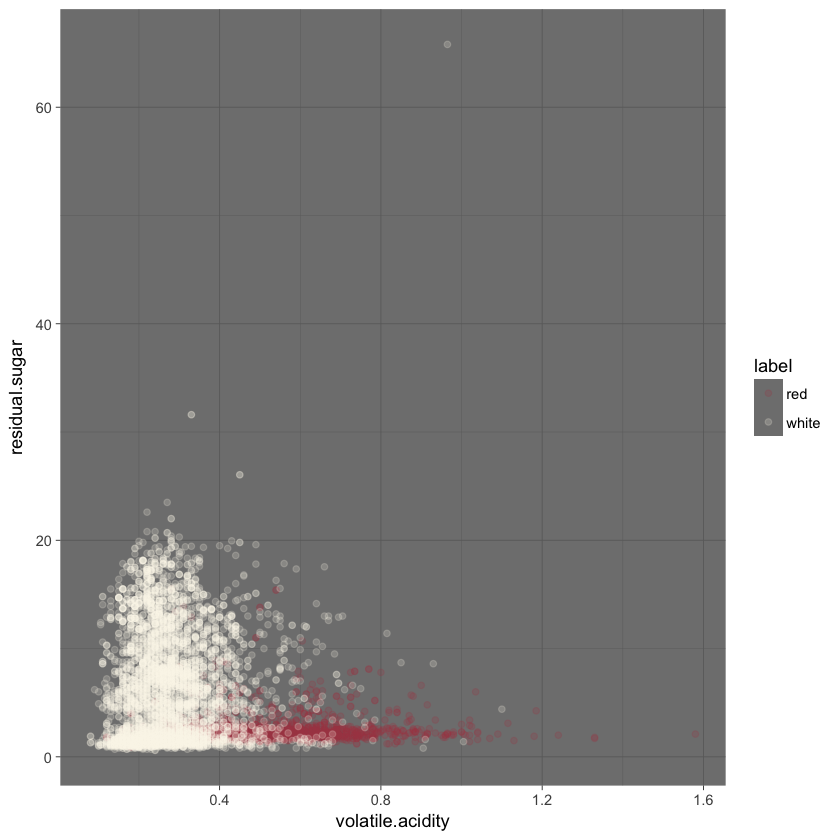

In [12]:
pl <- ggplot(wine,aes(x=volatile.acidity,y=residual.sugar)) + geom_point(aes(color=label),alpha=0.2)
# Optional die Füllbarben hinzufügen
pl + scale_color_manual(values = c('#ae4554','#faf7ea')) +theme_dark()

Wenn du magst kannst du hier noch andere Variablen probieren. Wir werden jetzt weiter im Thema machen. 


**Rufe die Weindaten ohne Label auf und benenne sie `clus.data`**

In [13]:
clus.data <- wine[,1:12]

**Überprüfe den head von `clus.data`**

In [14]:
head(clus.data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


## Erstellen der Cluster

**Führe die `kmeans()` Funktion auf `clus.data` aus und verweise das Resultat auf `wine.cluster`.**

In [15]:
wine.cluster <- kmeans(wine[1:12],2)

**Gebe die `wine.cluster` Cluster Durchschnitte (en. means) aus und untersuche die Informatiionen.**

In [16]:
print(wine.cluster$centers)

  fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1      6.904698        0.2871364   0.3398094       7.259286 0.0486092
2      7.619044        0.4079451   0.2911080       3.082690 0.0656846
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            39.82503            155.90101 0.9947956 3.190308 0.5000354
2            18.43735             63.54832 0.9945680 3.255147 0.5718655
   alcohol  quality
1 10.25832 5.825436
2 10.79529 5.809204


## Evaluierung der Cluster

Normalerweise haben sie nicht den Luxus von beschrifteten Daten mit KMeans. Lasst uns trotzdem kurz das Ergebniss anschauen. 

**Verwende die `table()` Funktion um deine Cluster mit den echten Ergebnissen zu vergleichen. Welche sind einfacher zu gruppieren? Rotweine oder Weißweine?**

In [17]:
table(wine$label,wine.cluster$cluster)

       
           1    2
  red     84 1515
  white 3588 1310

Wie wir sehen können, lassen sich die Rotweine besser zu Clustern gruppieren, was auch Sinn macht ausgehend von unserern vorrangehenden Visualisierungen. Bei den Weißweinen scheint es eine gewisse Unschärfe zu geben was an der Rosé Weinen liegen kann die hier auch unter Weißweinen kategorisiert sind. 
Es ist wichtig zu notieren, dass K-Means nur die Cluster ausgeben kann. K-Means kann nicht direkt ausgeben was die Beschreibung sein sollte oder wie viele Cluster man haben sollte. Wir hatten bei unserem Datensatz den Vorteil, dass es nur zwei Arten von Wein gab. 



# Gut gemacht!